Date path: 
/lustre/aoc/projects/hera/ajosaiti/SDR_RFI_monitoring_staging20191107/20191107
Reading SDR_SpectrumPeak.20191107-200002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-080002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-040002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-160002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-140002.n239.None.ridz
Reading SDR_SpectrumPeak.20191107-100002.n239.None.ridz
Reading SDR_SpectrumPeak.20191107-180002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-020002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-120002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-220002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-060002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-000002.n240.None.ridz
Data span 2019-11-07 00:00:02 - 2019-11-07 23:59:32


/users/ajosaiti/anaconda/envs/py2.7env/lib/python2.7/site-packages/rids/features/sp_handling_raw.py:228: RuntimeWarning: divide by zero encountered in log10
  print('In frequency range ['+str(np.round(self.full_freq[self.lo_chan],2))+', '+str(np.round(self.full_freq[self.hi_chan],2))+'] {}, Max power (dB) was '.format(self.rid.freq_unit)+str(10.*np.log10(p_max_linear))+' at '+str(f_of_p_max)+' {}'.format(self.rid.freq_unit)+', time: '+str(t_of_p_max))


In frequency range [49.99, 100.0] MHz, Max power (dB) was -inf at 0.0 MHz, time: .


/users/ajosaiti/anaconda/envs/py2.7env/lib/python2.7/site-packages/rids/features/sp_handling_raw.py:261: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(10.*np.log10(self.wf[fc]).astype(float), aspect='auto',interpolation='nearest',extent=lims,vmin=vmin,vmax=vmax,cmap='cubehelix')
/users/ajosaiti/anaconda/envs/py2.7env/lib/python2.7/site-packages/rids/features/sp_handling_raw.py:261: RuntimeWarning: invalid value encountered in log10
  plt.imshow(10.*np.log10(self.wf[fc]).astype(float), aspect='auto',interpolation='nearest',extent=lims,vmin=vmin,vmax=vmax,cmap='cubehelix')


The filepath for the sp_handling_raw function used to make s. object is: /users/ajosaiti/anaconda/envs/py2.7env/lib/python2.7/site-packages/rids/features/sp_handling_raw.pyc


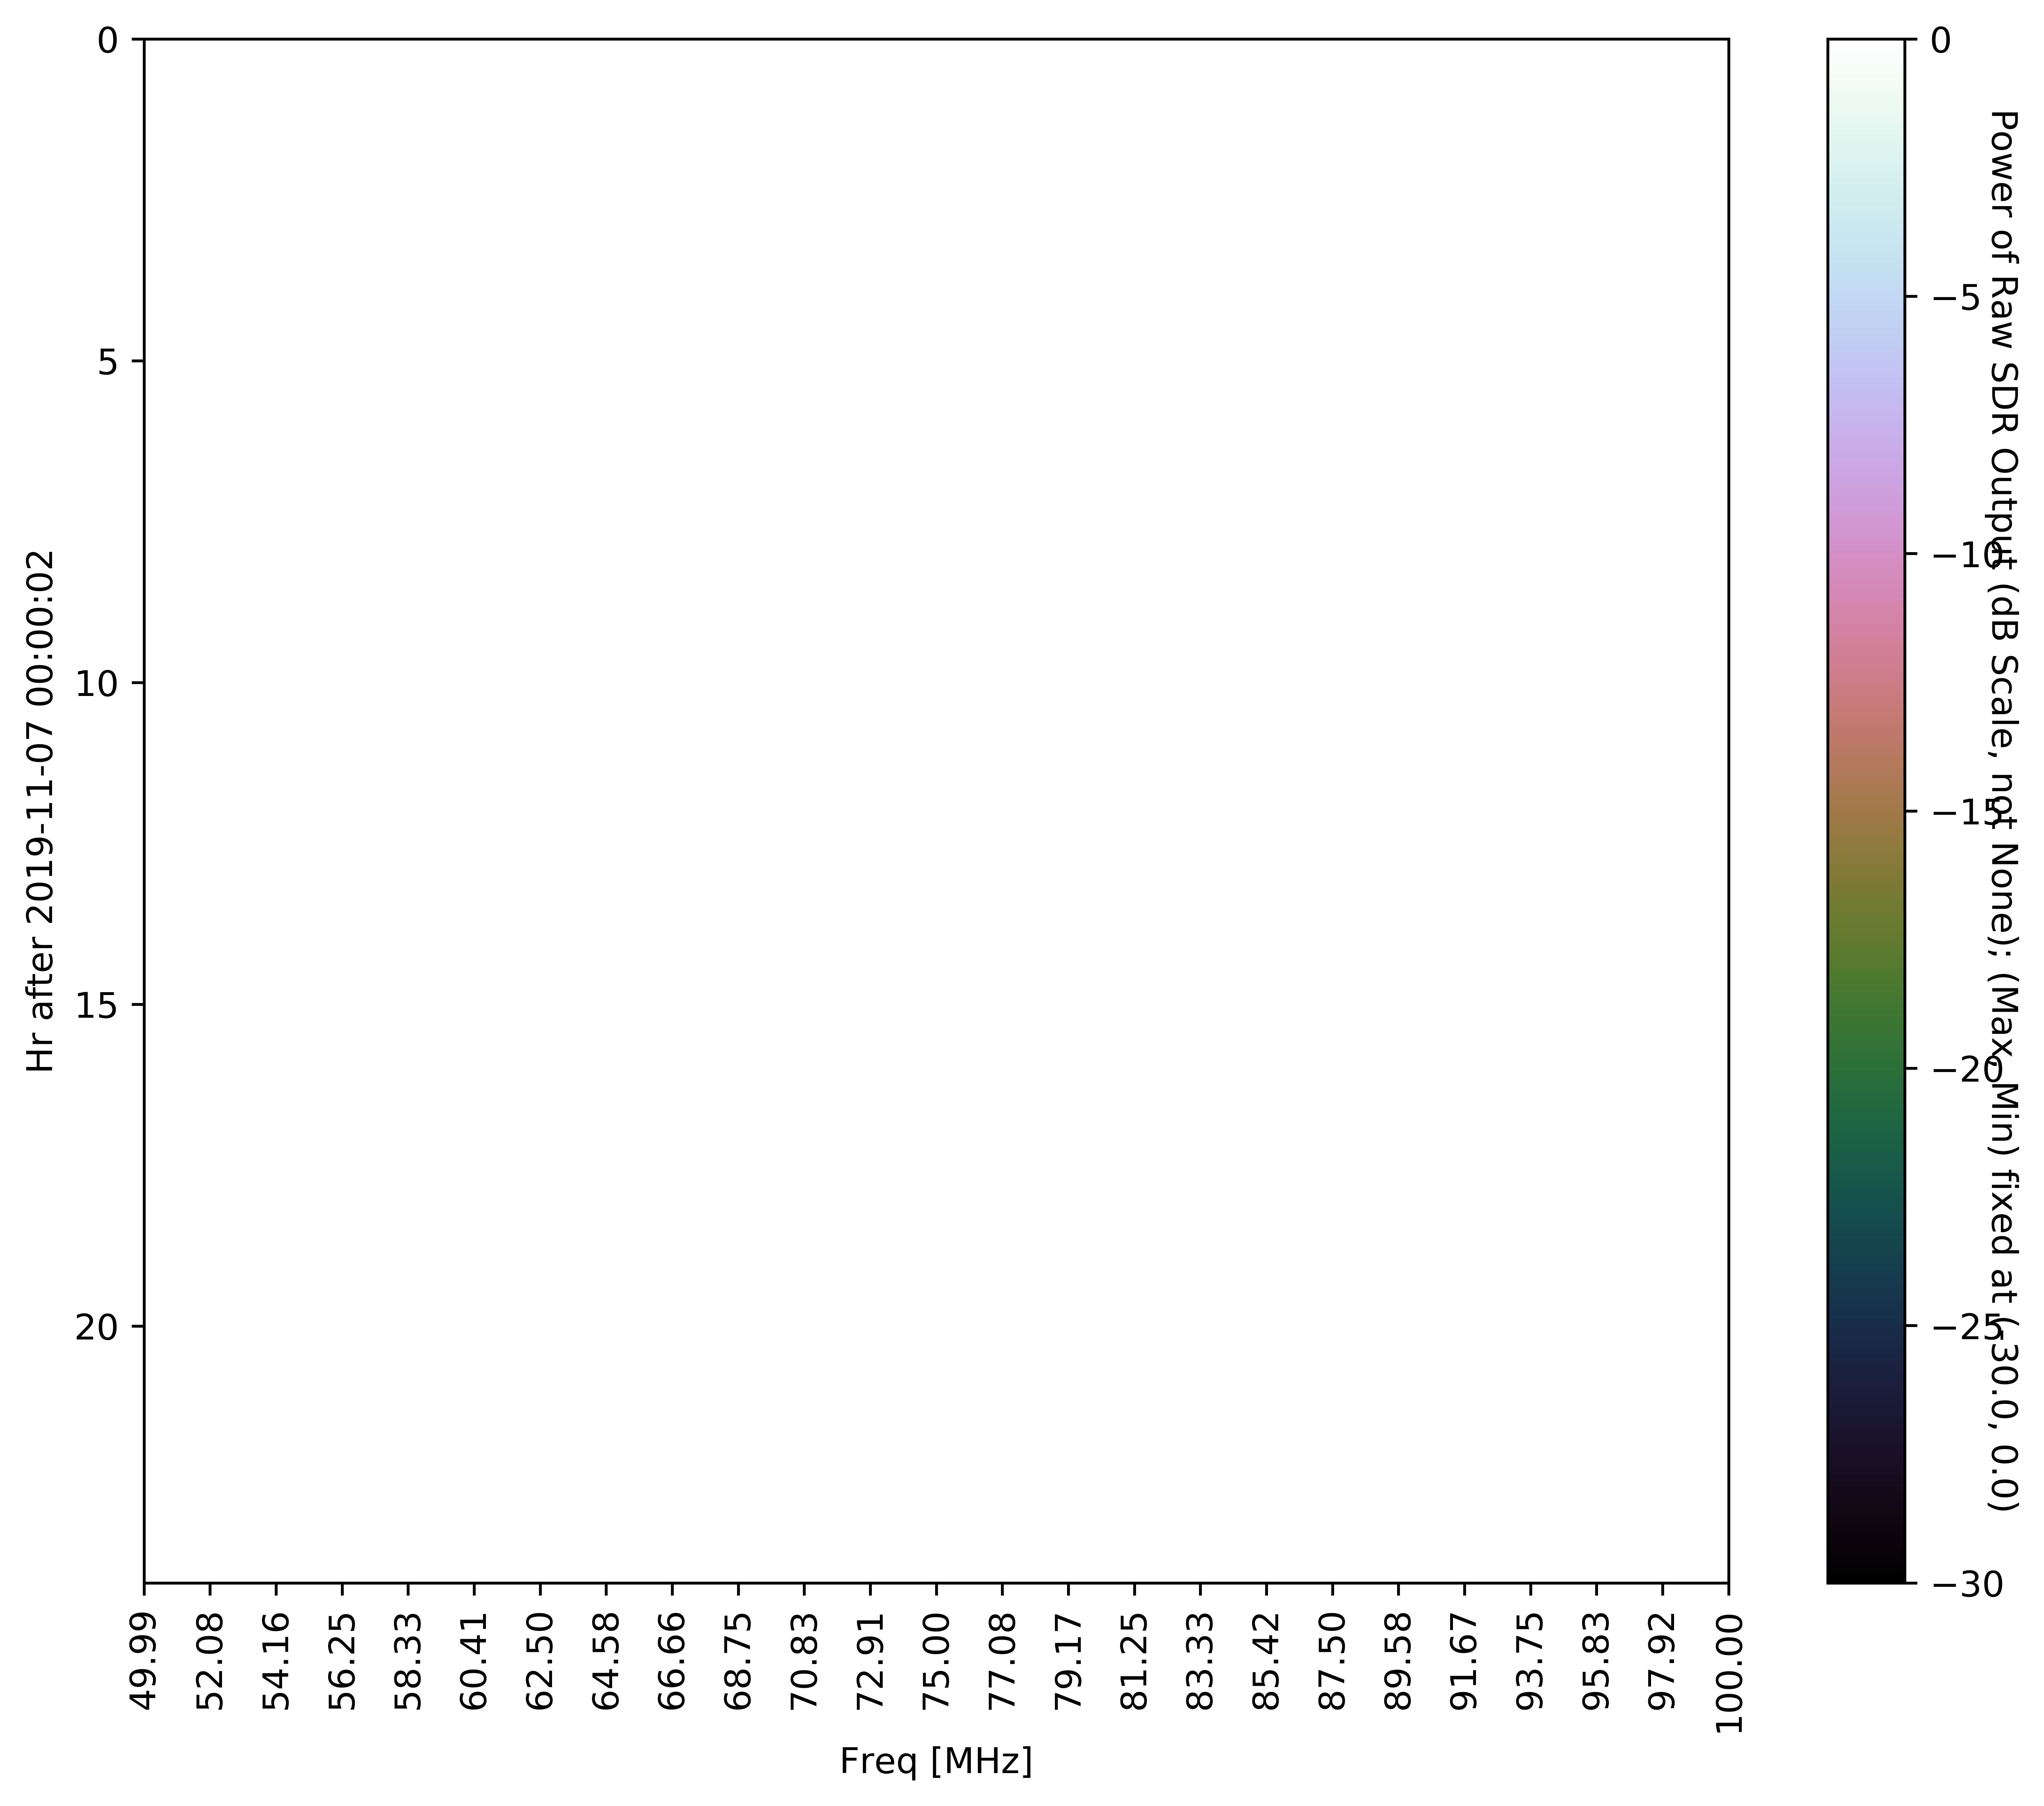

Reading SDR_SpectrumPeak.20191107-200002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-080002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-040002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-160002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-140002.n239.None.ridz
Reading SDR_SpectrumPeak.20191107-100002.n239.None.ridz
Reading SDR_SpectrumPeak.20191107-180002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-020002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-120002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-220002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-060002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-000002.n240.None.ridz
Data span 2019-11-07 00:00:02 - 2019-11-07 23:59:32
In frequency range [100.0, 150.0] MHz, Max power (dB) was -inf at 0.0 MHz, time: .
The filepath for the sp_handling_raw function used to make s. object is: /users/ajosaiti/anaconda/envs/py2.7env/lib/python2.7/site-packages/rids/features/sp_handling_raw.pyc


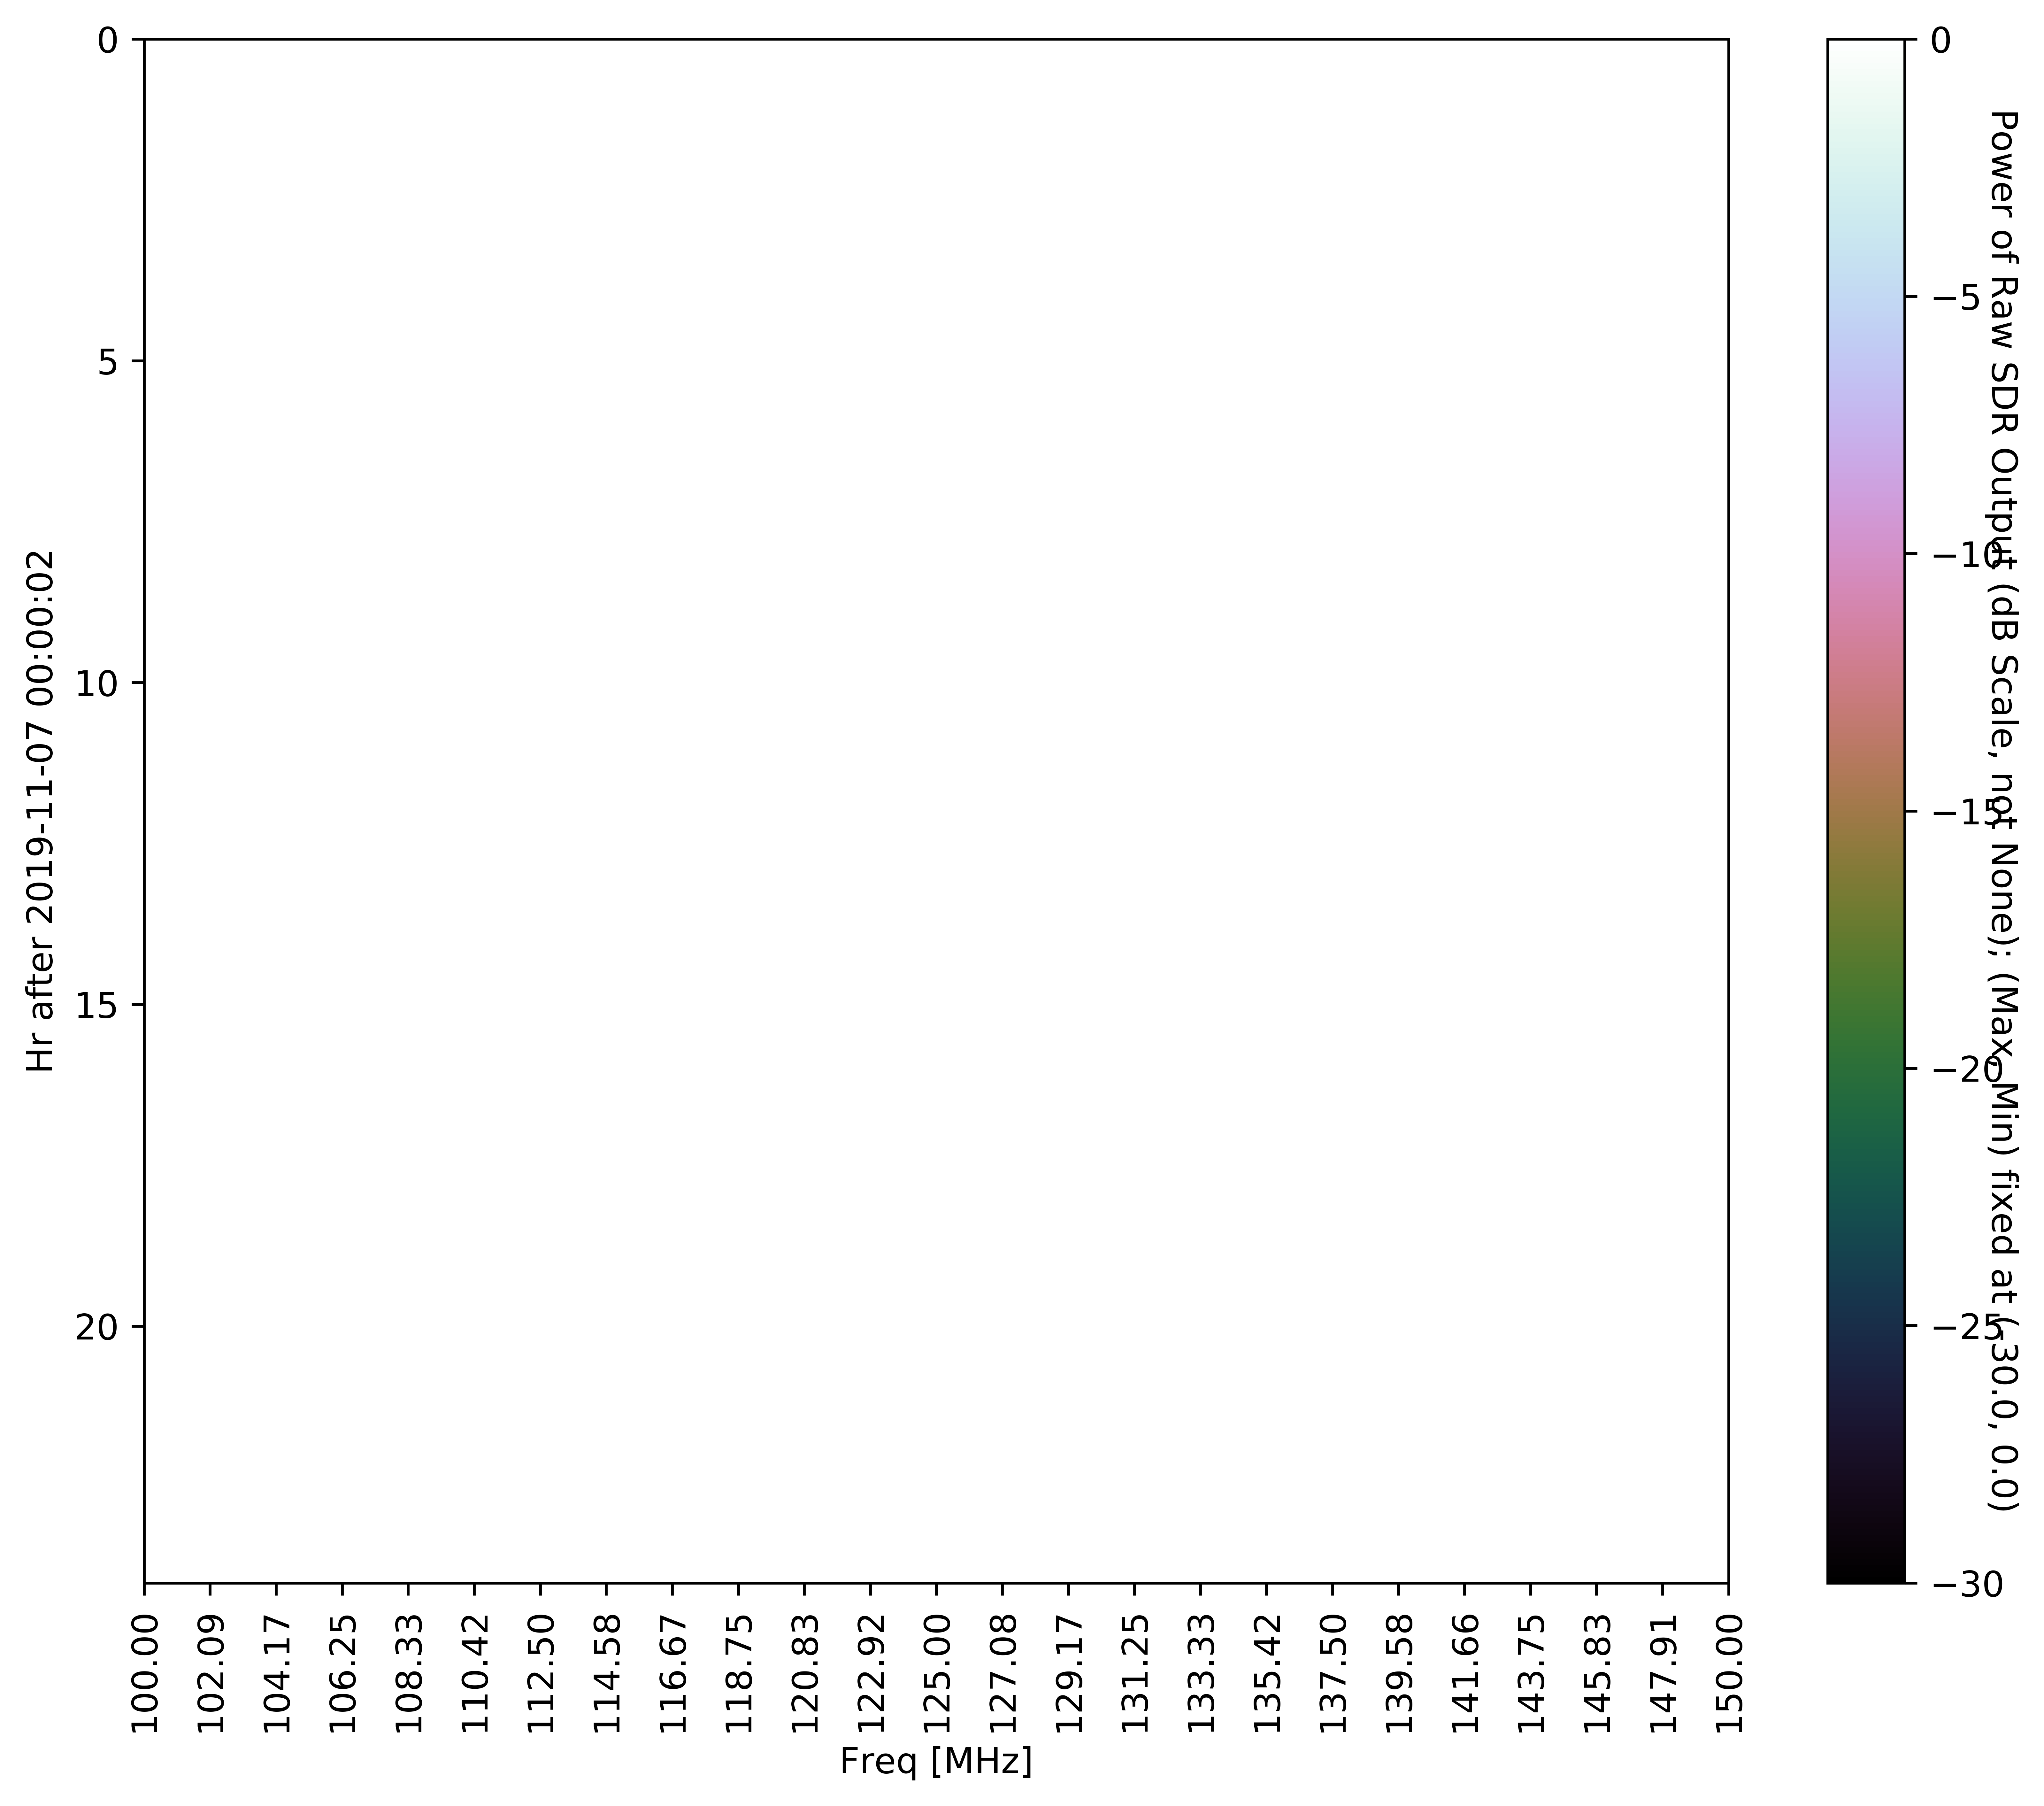

Reading SDR_SpectrumPeak.20191107-200002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-080002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-040002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-160002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-140002.n239.None.ridz
Reading SDR_SpectrumPeak.20191107-100002.n239.None.ridz
Reading SDR_SpectrumPeak.20191107-180002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-020002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-120002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-220002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-060002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-000002.n240.None.ridz
Data span 2019-11-07 00:00:02 - 2019-11-07 23:59:32
In frequency range [150.0, 199.99] MHz, Max power (dB) was -inf at 0.0 MHz, time: .
The filepath for the sp_handling_raw function used to make s. object is: /users/ajosaiti/anaconda/envs/py2.7env/lib/python2.7/site-packages/rids/features/sp_handling_raw.pyc


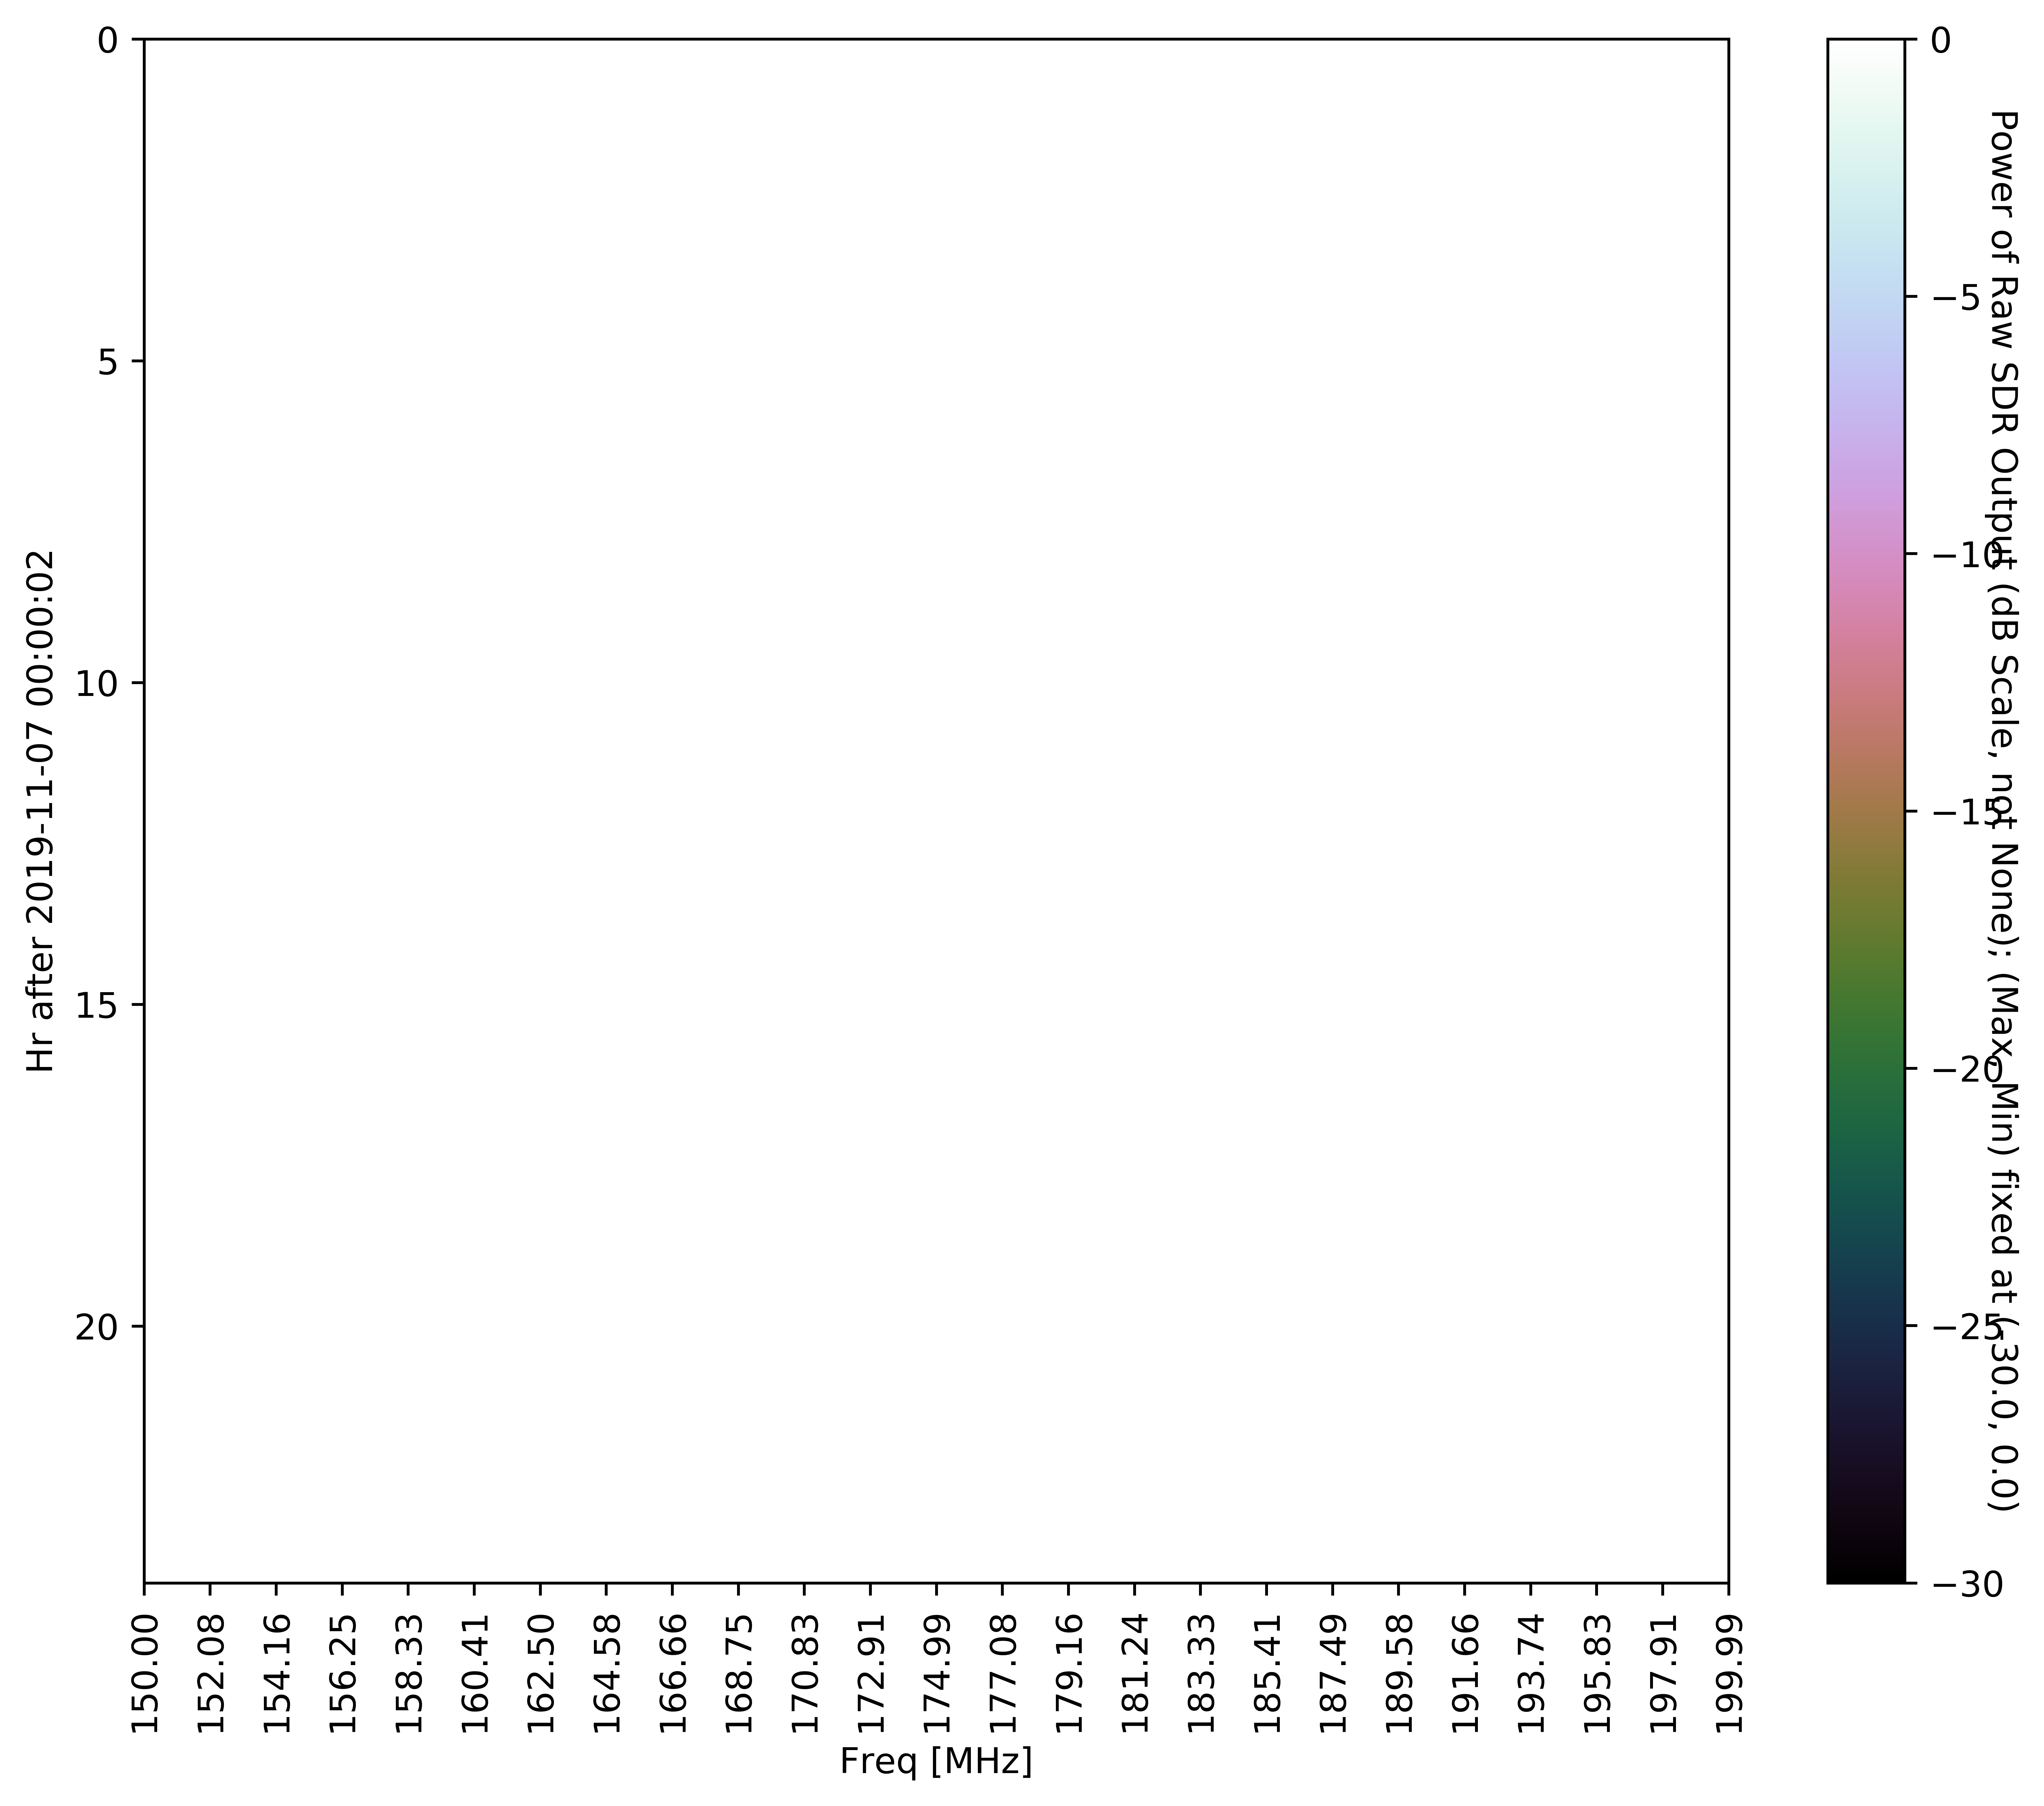

Reading SDR_SpectrumPeak.20191107-200002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-080002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-040002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-160002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-140002.n239.None.ridz
Reading SDR_SpectrumPeak.20191107-100002.n239.None.ridz
Reading SDR_SpectrumPeak.20191107-180002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-020002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-120002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-220002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-060002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-000002.n240.None.ridz
Data span 2019-11-07 00:00:02 - 2019-11-07 23:59:32
In frequency range [199.99, 250.0] MHz, Max power (dB) was -inf at 0.0 MHz, time: .
The filepath for the sp_handling_raw function used to make s. object is: /users/ajosaiti/anaconda/envs/py2.7env/lib/python2.7/site-packages/rids/features/sp_handling_raw.pyc


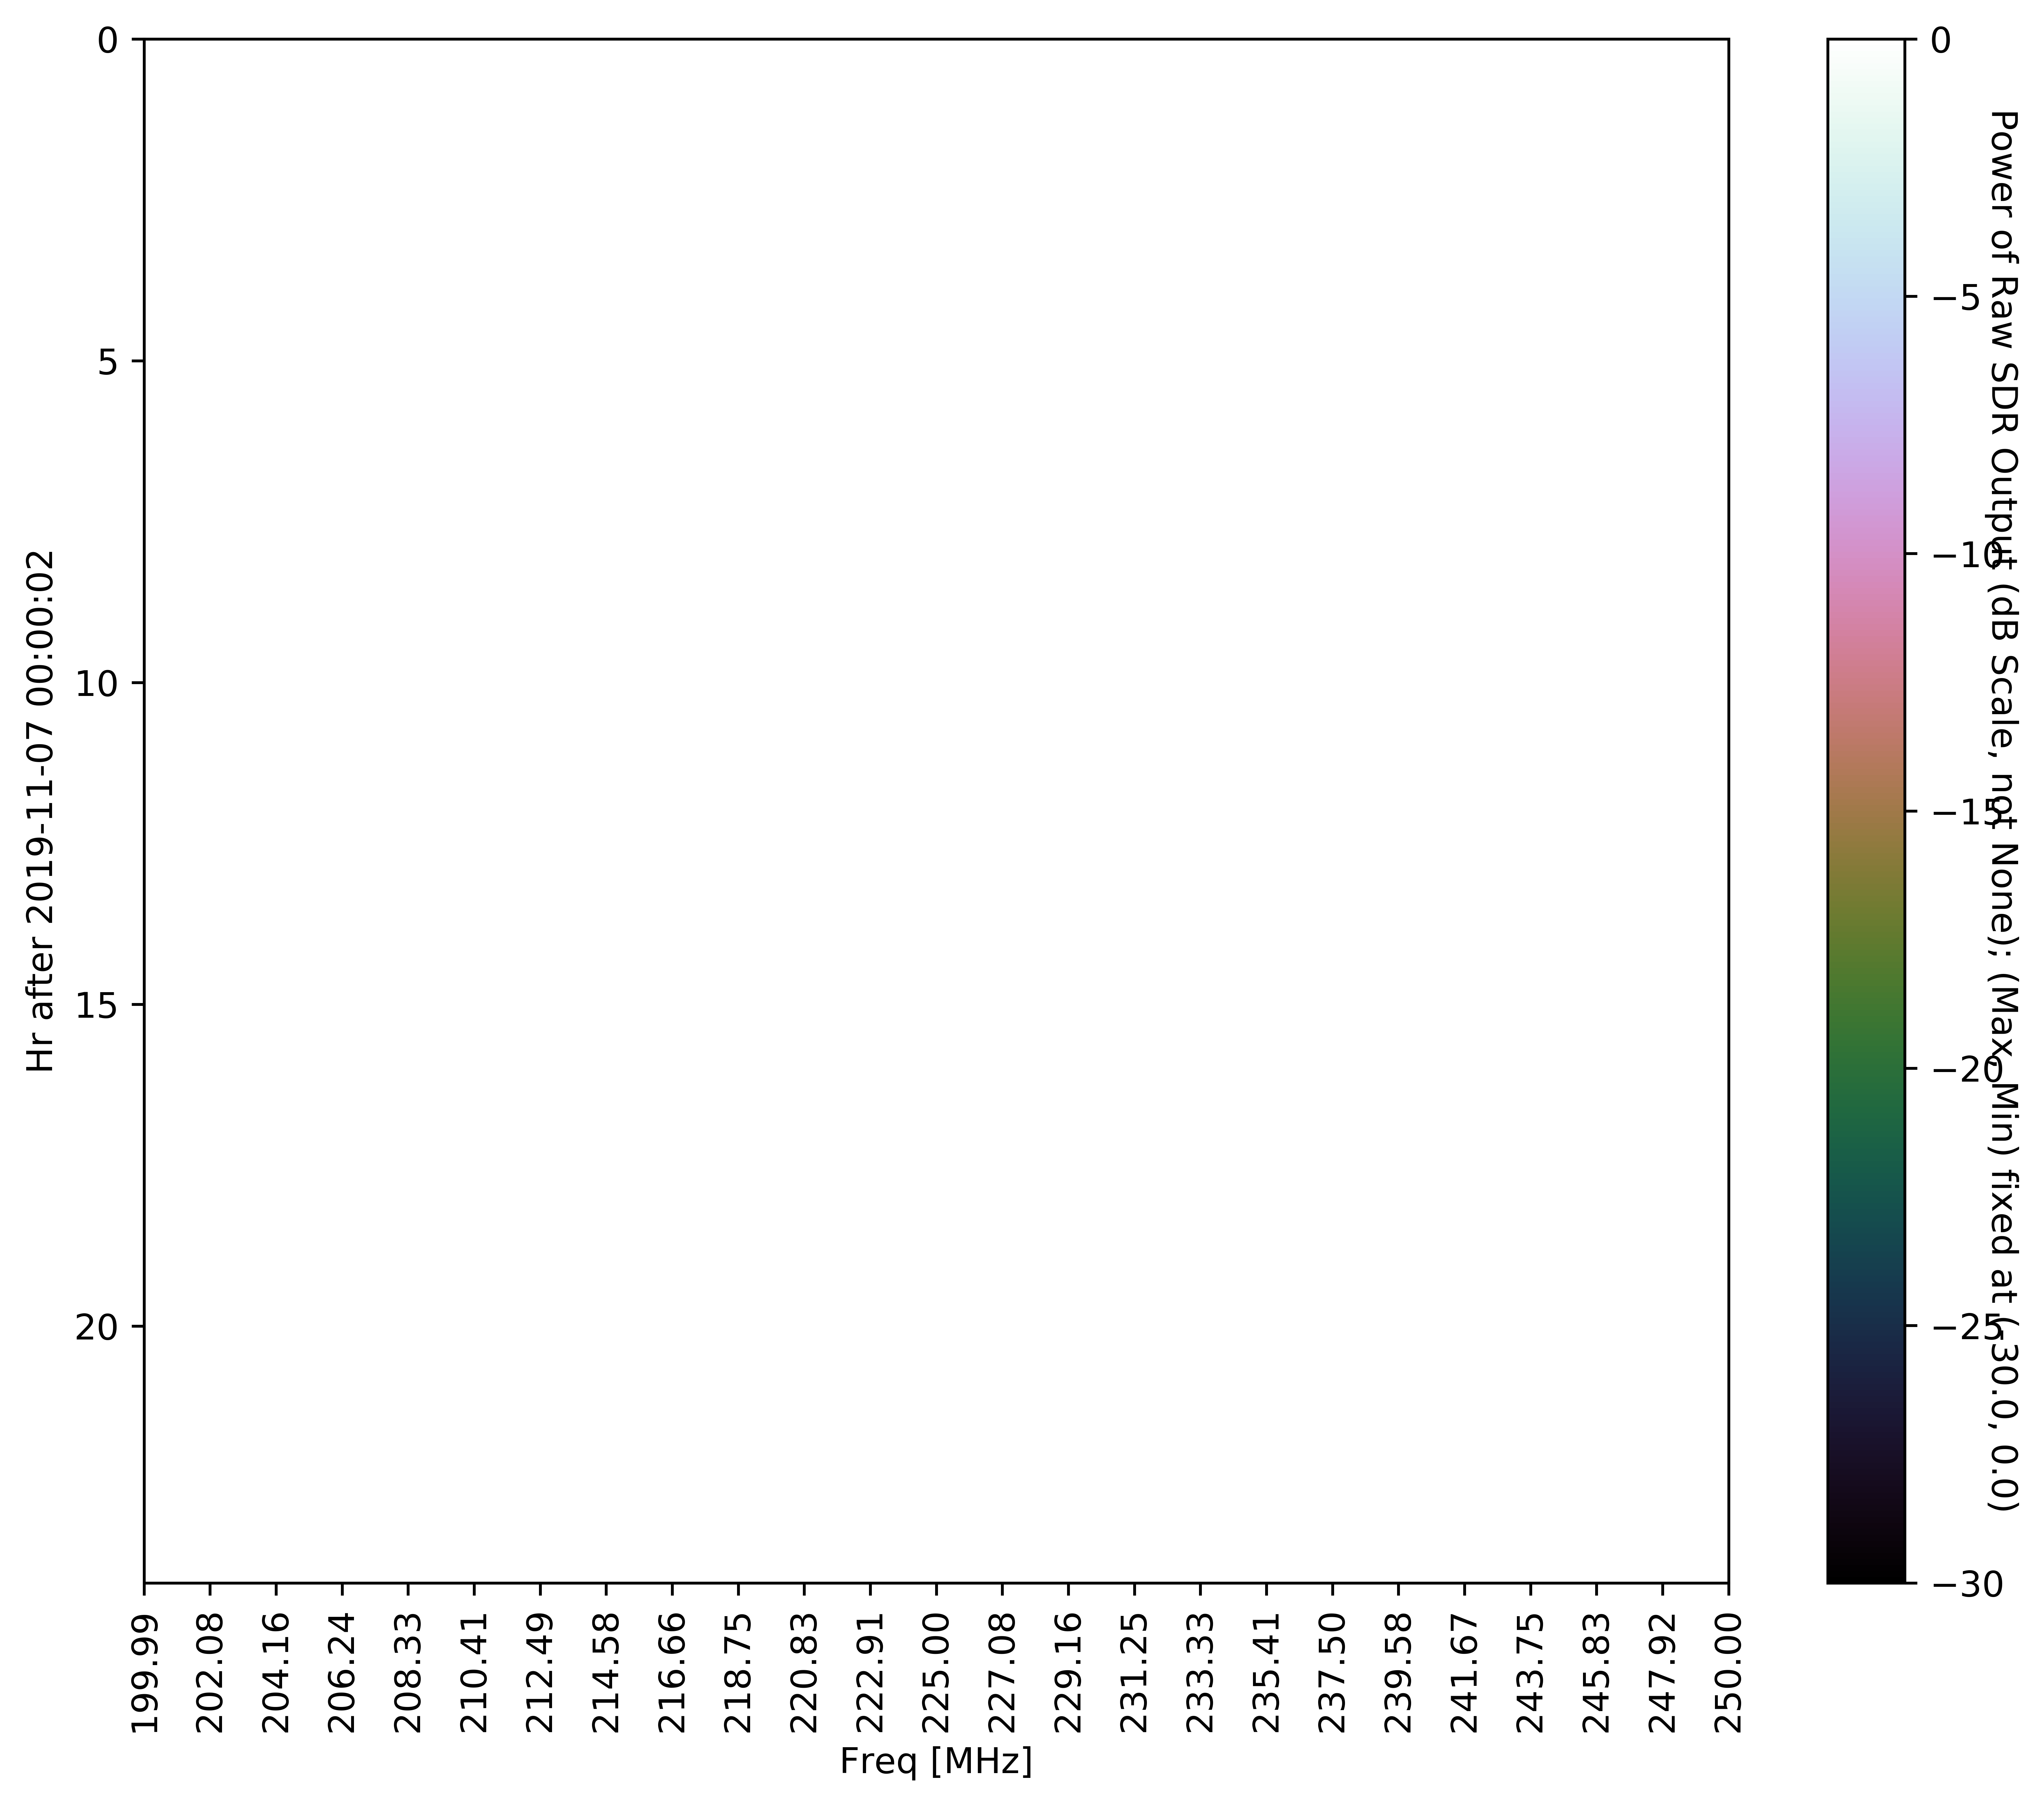

Reading SDR_SpectrumPeak.20191107-200002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-080002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-040002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-160002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-140002.n239.None.ridz
Reading SDR_SpectrumPeak.20191107-100002.n239.None.ridz
Reading SDR_SpectrumPeak.20191107-180002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-020002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-120002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-220002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-060002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-000002.n240.None.ridz
Data span 2019-11-07 00:00:02 - 2019-11-07 23:59:32
In frequency range [49.99, 250.0] MHz, Max power (dB) was -inf at 0.0 MHz, time: .
The filepath for the sp_handling_raw function used to make s. object is: /users/ajosaiti/anaconda/envs/py2.7env/lib/python2.7/site-packages/rids/features/sp_handling_raw.pyc


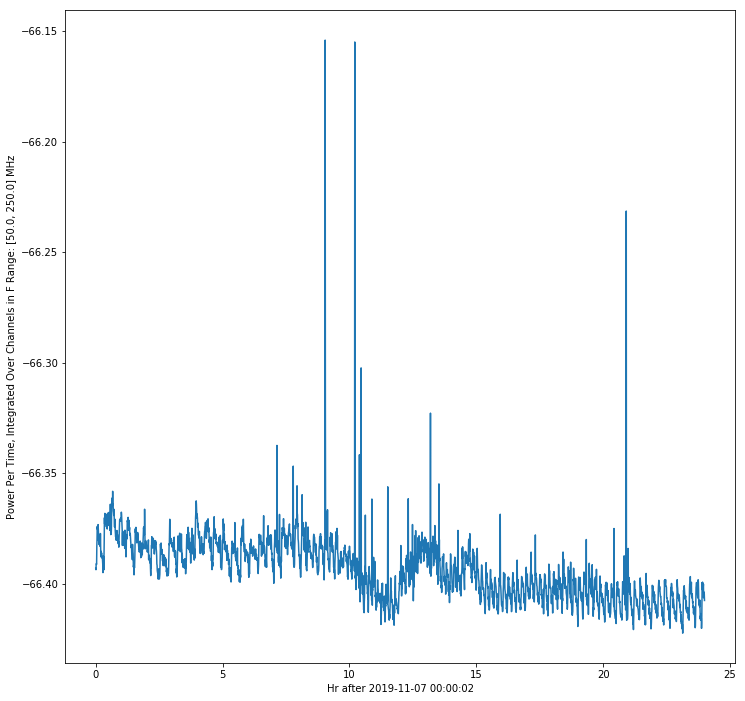

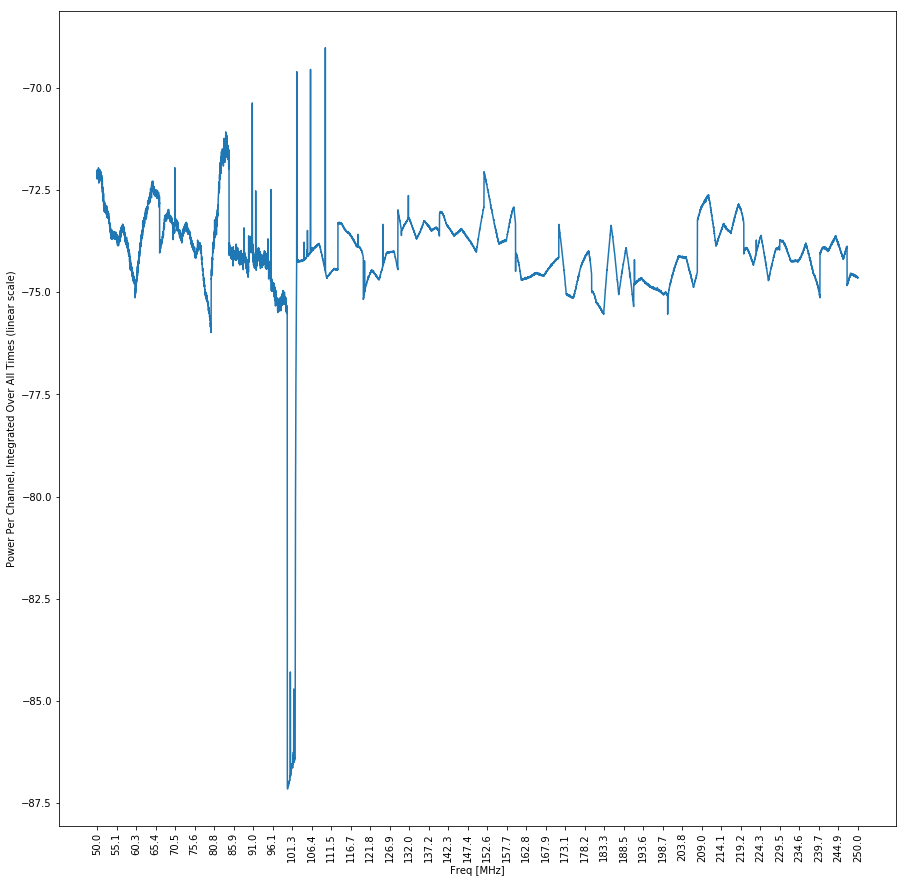

Reading SDR_SpectrumPeak.20191107-200002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-080002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-040002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-160002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-140002.n239.None.ridz
Reading SDR_SpectrumPeak.20191107-100002.n239.None.ridz
Reading SDR_SpectrumPeak.20191107-180002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-020002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-120002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-220002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-060002.n240.None.ridz
Reading SDR_SpectrumPeak.20191107-000002.n240.None.ridz
Data span 2019-11-07 00:00:02 - 2019-11-07 23:59:32
In frequency range [20.0, 500.0] MHz, Max power (dB) was -inf at 0.0 MHz, time: .
The filepath for the sp_handling_raw function used to make s. object is: /users/ajosaiti/anaconda/envs/py2.7env/lib/python2.7/site-packages/rids/features/sp_handling_raw.pyc


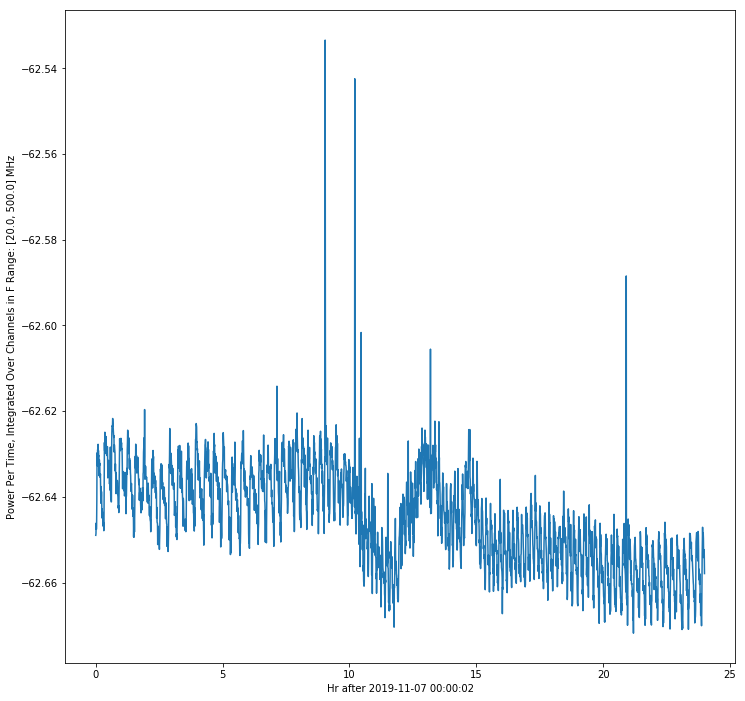

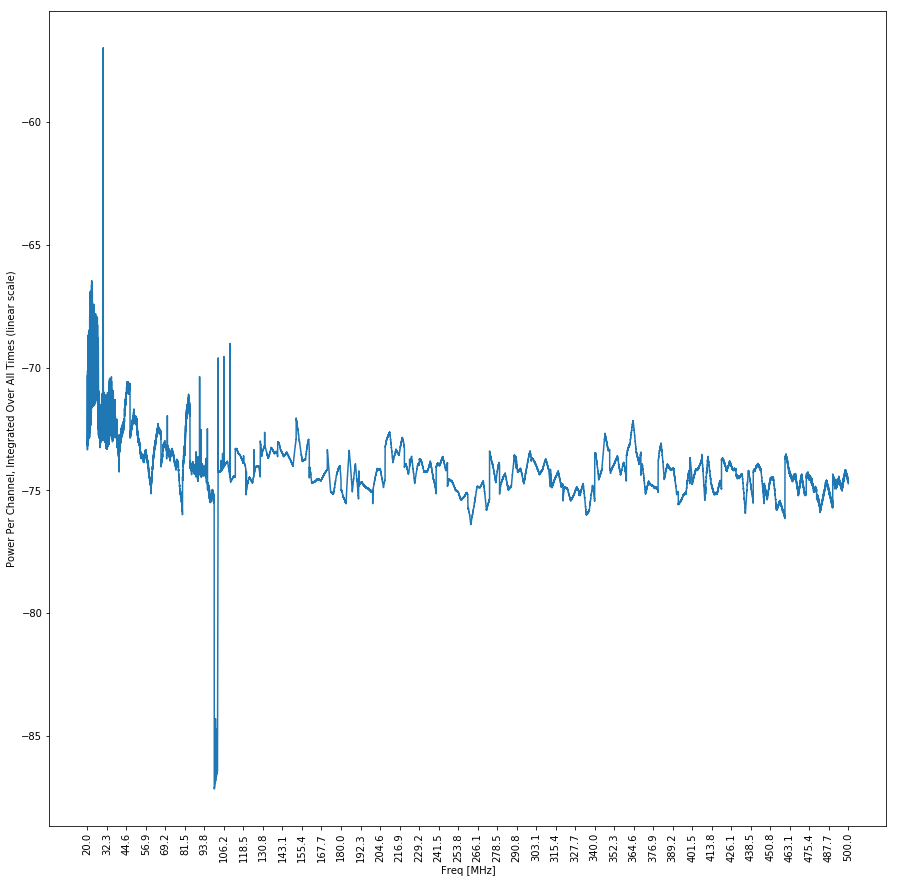

In [1]:
%matplotlib inline
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import os
import json
import subprocess

#Do not use the following lines when on lustre, only use them locally
#os.environ['staging_dir'] = '/Users/josaitis/gnuradio_tutorials/ridz_and_scripts/ridz_files/'
#os.environ['which_day'] = '20190917'
#os.environ['DEBUG'] = '0'
#os.environ['DATA_PATH'] = '/Users/josaitis/gnuradio_tutorials/ridz_and_scripts/'
#

#Change these lines based on whether or not you are working locally or on lustre
os.environ['USE_SDR_NO_CONNECTION'] = '1'
os.environ['SDR_NO_CONNECTION'] = 'SDR_nothing_connected_terminated.txt' # #file in DATA_PATH. Only used if USE_SDR_NO_CONNECTION is True. Used in proces() of sp_handling_raw.py, which is lauched in various args of sp_rawview.py
os.environ['SP_RAWVIEW_PATH'] ='/users/ajosaiti/anaconda/envs/py2.7env/rids/scripts/sp_rawview.py'#'/Users/josaitis/anaconda/lib/python2.7/site-packages/EGG-INFO/scripts/sp_rawview.py'# lustre: /users/ajosaiti/anaconda/envs/py2.7env/rids/scripts/sp_rawview.py
os.environ['SDR_NO_CONNECTION_PATH']='/lustre/aoc/projects/hera/ajosaiti/SDR_RFI_monitoring/HERA_daily_RFI/'
#

STR_DAY = os.environ['which_day']
DEBUG = bool(int(os.environ['DEBUG'])) #False
print('Date path: '+str(os.environ['DATA_PATH']))


def execute_sp_rawview_processes():
    #### check that these file ids aren't in processed_fileid.txt
    processed_file_dir = os.path.dirname(os.environ['DATA_PATH'])
    processed_fileid = np.loadtxt(os.path.join(processed_file_dir, 'processed_fileid.txt'), dtype=np.int)
   
    # filter out sessions already processed
    unprocessed_files = []
    pathname = []
    for diritem in os.listdir(os.environ['staging_dir']):
        
        if os.path.isdir(diritem) or str(diritem).isdigit():
            pathname = str(str(os.environ['staging_dir'])+'/'+str(diritem)+'/')
            print('  '+str(diritem)+' considered to be a dir.')
            for dir_file in os.listdir(pathname):
                name=str(dir_file)#file["name"])
                fileid = int(name[int(name.find('.')+1):name.find('-')])
                if (fileid not in processed_fileid) or DEBUG:
                    unprocessed_files.append(name)
                    
        else:
            pathname = str(os.environ['staging_dir']+'/')
            name=str(diritem)#file["name"])

            fileid = int(name[int(name.find('.')+1):name.find('-')])
            if (fileid not in processed_fileid) or DEBUG:
                unprocessed_files.append(name)

    %cd {pathname}
    str_args = str( str( ','.join([str(s) for s in os.listdir(pathname) if s.endswith('.ridz') and STR_DAY in s and os.stat(s).st_size !=0])))
    %run {os.environ['SP_RAWVIEW_PATH']} --wf val -f '50.,100.' {str_args}
    %run {os.environ['SP_RAWVIEW_PATH']} --wf val -f '100.,150.' {str_args}
    %run {os.environ['SP_RAWVIEW_PATH']} --wf val -f '150.,200.' {str_args}
    %run {os.environ['SP_RAWVIEW_PATH']} --wf val -f '200.,250.' {str_args}
    %run {os.environ['SP_RAWVIEW_PATH']} --totalpower val -f '50.,250.' {str_args}
    %run {os.environ['SP_RAWVIEW_PATH']} --totalpower val {str_args}
    
    return pathname 

pathname = execute_sp_rawview_processes()

#create pathname environment variable so I can add librarian events in run_notebook.sh. This pathname may be different than the staging_dir var.
os.environ['staging_pathname']=pathname